In [1]:
import glob
import re
import string
import codecs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
whitepaper_files = glob.glob('./crypto-pytho/whitepapers/*.txt')
whitepapers = []
for file in whitepaper_files:
    whitepapers.append(file)

In [3]:
def makeWordList(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*','',corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]','',text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)

documents = []

for file in whitepaper_files:
    doc = makeWordList(file)
    documents.append(doc)

In [4]:
documents

['bitcoin a peertopeer electronic cash system satoshi nakamoto satoshingmxcom wwwbitcoinorg abstract a purely peertopeer version of electronic cash would allow online payments to be sent directly from one party to another without going through a financial institution digital signatures provide part of the solution but the main benefits are lost if a trusted third party is still required to prevent doublespending we propose a solution to the doublespending problem using a peertopeer network the network timestamps transactions by hashing them into an ongoing chain of hashbased proofofwork forming a record that cannot be changed without redoing the proofofwork the longest chain not only serves as proof of the sequence of events witnessed but proof that it came from the largest pool of cpu power as long as a majority of cpu power is controlled by nodes that are not cooperating to attack the network theyll generate the longest chain and outpace attackers the network itself requires minimal 

In [5]:
vocab_size = 1000
from sklearn.feature_extraction.text import CountVectorizer

# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                max_features=vocab_size,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(documents)

In [6]:
print(tf_vectorizer.get_feature_names())


['abstract', 'abuse', 'acceptance', 'accepted', 'accepting', 'accessible', 'accomplish', 'according', 'account', 'accounts', 'acquire', 'act', 'actually', 'adam', 'addition', 'additional', 'adds', 'agree', 'agreed', 'agreement', 'ahead', 'algorithm', 'algorithms', 'alice', 'allocated', 'allow', 'allows', 'amounts', 'analysis', 'annual', 'anonymous', 'api', 'application', 'applied', 'apply', 'approach', 'approximately', 'april', 'arbitrary', 'architecture', 'assigning', 'associated', 'assume', 'assumed', 'assumption', 'asynchronous', 'attack', 'attacker', 'attackers', 'attempted', 'attempting', 'attempts', 'authentication', 'automatically', 'available', 'avoid', 'backs', 'balance', 'balances', 'bank', 'banking', 'basis', 'begins', 'believe', 'benefit', 'binary', 'blockchain', 'blockchains', 'bmoney', 'bob', 'bound', 'branch', 'branches', 'breaking', 'broad', 'broadcast', 'broken', 'building', 'built', 'buyers', 'called', 'came', 'cap', 'capable', 'care', 'carry', 'cases', 'catch', 'cent

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 5

lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=7)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=7, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [8]:
lda.components_.shape

(5, 622)

In [9]:
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in lda.components_])

In [10]:
num_top_words = 10

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

import numpy as np
for topic_idx in range(num_topics):
    print('[Topic %d]' % topic_idx)
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print('\t%s: %f' % (tf_vectorizer.get_feature_names()[word_idx], topic_word_distributions[topic_idx, word_idx]))
    print()

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
	blockchain: 0.006515
	state: 0.006479
	contract: 0.005353
	contracts: 0.005120
	account: 0.004732
	ethereum: 0.004385
	decentralized: 0.004174
	attacker: 0.003664
	protocol: 0.003589
	software: 0.003444

[Topic 1]
	ethereum: 0.025359
	contract: 0.025161
	decentralized: 0.022065
	state: 0.020698
	blockchain: 0.020128
	contracts: 0.018441
	protocol: 0.013660
	account: 0.011819
	transition: 0.007645
	miners: 0.007641

[Topic 2]
	attacker: 0.025277
	honest: 0.020051
	problem: 0.011035
	coins: 0.011010
	coin: 0.010950
	nonce: 0.010913
	majority: 0.009639
	root: 0.008390
	solution: 0.008363
	privacy: 0.008330

[Topic 3]
	ethereum: 0.002317
	contract: 0.002287
	decentralized: 0.002062
	protocol: 0.002001
	contracts: 0.001983
	millions: 0.001949
	account: 0.001937
	protocols: 0.001920
	far: 0.001918
	example: 0.001903

[Topic 4]
	blockchain: 0.053810
	software: 0.039992
	account: 0.034720
	application

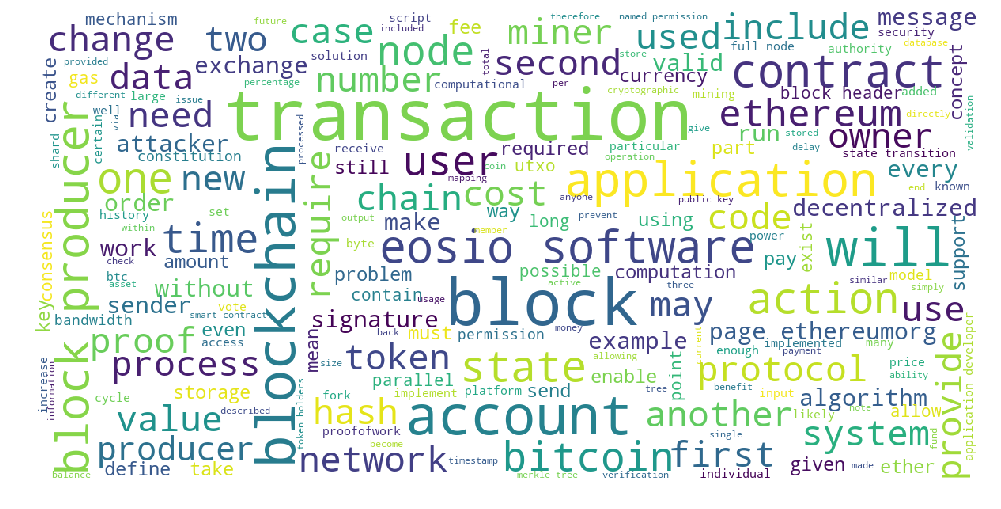

In [11]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.update(('http','RT','https','follower'))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30, 
        scale=3,
        random_state=69 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(17, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(documents)

In [12]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
output_notebook()

Loading BokehJS ...

In [13]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
svd = TruncatedSVD(n_components=2)
documents_2d = svd.fit_transform(tf)
 
df = pd.DataFrame(columns=['x', 'y', 'document'])
df['x'], df['y'], df['document'] = documents_2d[:,0], documents_2d[:,1], range(len(documents))
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="document", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [14]:
whitepaper_files

['./crypto-pytho/whitepapers/bitcoin_whitepaper.txt',
 './crypto-pytho/whitepapers/ethereum_whitepaper.txt',
 './crypto-pytho/whitepapers/eos_whitepaper.txt']

In [15]:
svd = TruncatedSVD(n_components=2)
words_2d = svd.fit_transform(tf.T)
 
df = pd.DataFrame(columns=['x', 'y', 'word'])
df['x'], df['y'], df['word'] = words_2d[:,0], words_2d[:,1], tf_vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(df))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [17]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
4      48.227931        1       1  149.016861   -8.568518
1      43.099177        1       2  189.240479 -130.517593
2       8.650752        1       3   67.507896 -154.767471
0       0.011082        1       4  -43.914902 -100.067146
3       0.011059        1       5   26.292585    7.451156, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
66    Default  188.000000     blockchain  188.000000  30.0000  30.0000
537   Default  108.000000       software  108.000000  29.0000  29.0000
553   Default  110.000000          state  110.000000  28.0000  28.0000
139   Default   73.000000       contract   73.000000  27.0000  27.0000
208   Default   63.000000       ethereum   63.000000  26.0000  26.0000
8     Default  119.000000        account  119.000000  25.0000  25.0000
140   Default   50.000000      contracts   50.000000  24.0000  24.0000
158   Default   64.000000  decentralized   64.000000  23.0000  23.0000
32    Default   76.000000    application   76.000000  22.0000  22.0000
438   Default   40.000000       protocol   40.000000  21.0000  21.0000
9     Default   66.000000       accounts   66.000000  20.0000  20.0000
47    Default   26.000000       attacker   26.000000  19.0000  19.0000
402   Default   39.000000       parallel   39.000000  18.0000  18.0000
577   Default   37.000000         tokens   37.000000  17.0000  17.0000
576   Default   40.000000          token   40.000000  16.0000  16.0000
211   Default   28.000000        example   28.000000  15.0000  15.0000
67    Default   29.000000    blockchains   29.000000  14.0000  14.0000
509   Default   30.000000         second   30.000000  13.0000  13.0000
118   Default   34.000000    computation   34.000000  12.0000  12.0000
581   Default   19.000000     transition   19.000000  11.0000  11.0000
514   Default   21.000000           send   21.000000  10.0000  10.0000
357   Default   24.000000          means   24.000000   9.0000   9.0000
568   Default   16.000000        systems   16.000000   8.0000   8.0000
181   Default   26.000000     developers   26.000000   7.0000   7.0000
26    Default   26.000000         allows   26.000000   6.0000   6.0000
366   Default   19.000000         miners   19.000000   5.0000   5.0000
425   Default   20.000000        problem   20.000000   4.0000   4.0000
535   Default   22.000000          smart   22.000000   3.0000   3.0000
232   Default   18.000000      financial   18.000000   2.0000   2.0000
521   Default   18.000000            set   18.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
139    Topic5    0.001376       contract   73.843061  -1.7811  -6.0807
299    Topic5    0.001049        initial    4.703076   0.7014  -6.3519
148    Topic5    0.001120        creates   10.936530  -0.0765  -6.2859
439    Topic5    0.001155      protocols   16.933679  -0.4834  -6.2556
98     Topic5    0.001058         choose    5.317507   0.5876  -6.3429
158    Topic5    0.001240  decentralized   64.211976  -1.7448  -6.1842
438    Topic5    0.001204       protocol   40.500011  -1.3139  -6.2141
248    Topic5    0.001118        general   12.638715  -0.2235  -6.2883
620    Topic5    0.001059        writing    5.576036   0.5408  -6.3423
140    Topic5    0.001193      contracts   50.174710  -1.5370  -6.2230
535    Topic5    0.001139          smart   22.621011  -0.7871  -6.2697
380    Topic5    0.001098      necessary   10.956821  -0.0988  -6.3064
470    Topic5    0.001088        reduces    9.126792   0.0746  -6.3157
211    Topic5    0.001145        example   28.926287  -1.0275  -6.2642
383    Topic5    0.001112          nonce   14.885952  -0.3927  -6.2938
47     Topic5    0.001128       attacker   26.120232  -0.9399  -6.2787
521    Topic5    0.001110            set   18.981637  -0.6370  -6.2950
1